In [376]:
import pandas
from scipy.io import arff
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from dl85 import DL85Predictor
from dl85 import DL85Classifier
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import MyCode.utils as utils
import graphviz
from MyCode import relabeling
from MyCode import relabeling_sklearn

In [377]:
pd.set_option('max_columns', None)
FILE_NAME = "relab_Lawsuit"

# src: https://www.kaggle.com/hjmjerry/gender-discrimination
df = pandas.read_csv("dataset_perso/Lawsuit.csv")
del df['ID']
df

,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
0,1,1,0,0,7.4,9,3,77836,84612
1,1,1,0,0,6.7,10,2,69994,78497
2,1,1,0,0,8.1,6,1,62872,67756
3,1,1,1,1,5.1,27,3,155196,173220
4,1,1,0,0,7.0,10,3,89268,96099
...,...,...,...,...,...,...,...,...,...
256,6,0,1,1,2.9,8,2,297174,323699
257,6,0,1,1,2.6,9,3,308081,339664
258,6,0,1,1,2.8,8,1,211269,241577
259,6,0,1,1,2.4,2,1,210801,233905


In [378]:
salary_mean = np.mean(np.array(df["Sal94"].tolist(), float))
for i in range(0,len(df)):
    if df.at[i, "Sal94"] >= salary_mean:
        df.at[i, "Salary_mean"] = 1
    else:
        df.at[i, "Salary_mean"] = 0
del df["Sal94"]
del df["Sal95"]
df

,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Salary_mean
0,1,1,0,0,7.4,9,3,0.0
1,1,1,0,0,6.7,10,2,0.0
2,1,1,0,0,8.1,6,1,0.0
3,1,1,1,1,5.1,27,3,1.0
4,1,1,0,0,7.0,10,3,0.0
...,...,...,...,...,...,...,...,...
256,6,0,1,1,2.9,8,2,1.0
257,6,0,1,1,2.6,9,3,1.0
258,6,0,1,1,2.8,8,1,1.0
259,6,0,1,1,2.4,2,1,1.0


In [379]:
col = ['Rank', 'Dept']
df = df.drop(['Prate', 'Exper'], axis=1)
df = pd.get_dummies(df, columns=col)
df

,Gender,Clin,Cert,Salary_mean,Rank_1,Rank_2,Rank_3,Dept_1,Dept_2,Dept_3,Dept_4,Dept_5,Dept_6
0,1,0,0,0.0,0,0,1,1,0,0,0,0,0
1,1,0,0,0.0,0,1,0,1,0,0,0,0,0
2,1,0,0,0.0,1,0,0,1,0,0,0,0,0
3,1,1,1,1.0,0,0,1,1,0,0,0,0,0
4,1,0,0,0.0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,0,1,1,1.0,0,1,0,0,0,0,0,0,1
257,0,1,1,1.0,0,0,1,0,0,0,0,0,1
258,0,1,1,1.0,1,0,0,0,0,0,0,0,1
259,0,1,1,1.0,1,0,0,0,0,0,0,0,1


In [380]:
X = df.loc[:, ~df.columns.isin(['Gender', 'Salary_mean'])]
y = df['Salary_mean']
sensitive = df['Gender']
utils.discrimination(y, sensitive)

-0.31205112598904444

In [381]:
for i in range(0,len(df)):
    if df.at[i, "Gender"] == 1:
        df.at[i, "Gender"] = 0
    else:
        df.at[i, "Gender"] = 1
utils.discrimination(y, sensitive)

0.31205112598904444

In [382]:
X_train, X_test, y_train, y_test, sensitive_train, sensitive_test = utils.train_test_split(1, X, y, sensitive)

In [383]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, list(y_train))
y_pred_train = clf.predict(X_train)
accuracy_train = round(accuracy_score(y_train, y_pred_train),6)
print("Accuracy DL8.5 on training set =", accuracy_train)
discrimation_train_pred = round(utils.discrimination(y_pred_train, sensitive_train), 6)
print("Discrimination of classifier on train(pred)", discrimation_train_pred)

Accuracy DL8.5 on training set = 0.880383
Discrimination of classifier on train(pred) 0.312952


[Text(313.875, 285.39000000000004, 'X[10] <= 0.5\ngini = 0.479\nsamples = 209\nvalue = [126, 83]'),
 Text(251.10000000000002, 203.85000000000002, 'X[9] <= 0.5\ngini = 0.41\nsamples = 177\nvalue = [126, 51]'),
 Text(125.55000000000001, 122.31, 'X[1] <= 0.5\ngini = 0.147\nsamples = 113\nvalue = [104, 9]'),
 Text(62.775000000000006, 40.76999999999998, 'gini = 0.0\nsamples = 52\nvalue = [52, 0]'),
 Text(188.32500000000002, 40.76999999999998, 'gini = 0.252\nsamples = 61\nvalue = [52, 9]'),
 Text(376.65000000000003, 122.31, 'X[2] <= 0.5\ngini = 0.451\nsamples = 64\nvalue = [22, 42]'),
 Text(313.875, 40.76999999999998, 'gini = 0.17\nsamples = 32\nvalue = [3, 29]'),
 Text(439.42500000000007, 40.76999999999998, 'gini = 0.482\nsamples = 32\nvalue = [19, 13]'),
 Text(376.65000000000003, 203.85000000000002, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]')]

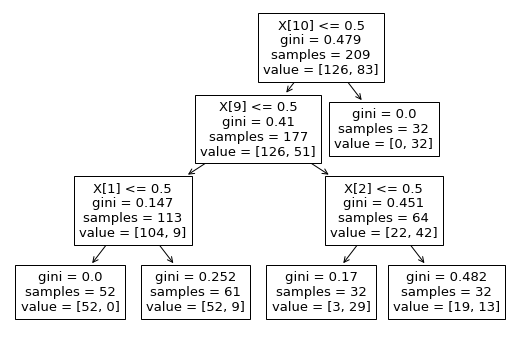

In [384]:
from sklearn import tree
tree.plot_tree(clf)

In [385]:
leafs = list()
cnt = np.unique(sensitive, return_counts=True)[1]
relabeling_sklearn.leafs_to_relabel(clf.tree_, X_train, y_train, sensitive_train, cnt[0], cnt[1], leafs, len(y_train), 0)


In [386]:
leafs_relab = relabeling_sklearn.relab(clf.tree_, X_train, y_train, y_pred_train, sensitive_train, 0.1)
print()
sum_acc = 0
sum_disc = 0
for l in leafs_relab:
    print(l.value)
    print(l)
    print()
    sum_acc += l.acc
    sum_disc += l.disc
sum_acc = round(sum_acc, 6)
sum_disc = round(sum_disc, 6)


[[19. 13.]]
Path: ((10, 'left', 0), (9, 'right', 1), (2, 'right', 5), (-2, 'leaf', 7)) 
accuracy: -0.02870813397129187 
node_id: 7 
discrimination: -0.08238095238095242 
ratio: 2.8696031746031756 
contigency: 
[0.05741626794258373, 0.023923444976076555]
[0.03349282296650718, 0.03827751196172249]
transactions: [123, 126, 127, 129, 131, 132, 133, 134, 136, 138, 140, 143, 147, 150, 153, 155, 156, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 172, 174, 175, 176]

[[ 3. 29.]]
Path: ((10, 'left', 0), (9, 'right', 1), (2, 'left', 5), (-2, 'leaf', 6)) 
accuracy: -0.1244019138755981 
node_id: 6 
discrimination: -0.15647619047619046 
ratio: 1.2578278388278386 
contigency: 
[0.004784688995215311, 0.019138755980861243]
[0.009569377990430622, 0.11961722488038277]
transactions: [113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 128, 130, 135, 137, 139, 141, 142, 144, 145, 146, 148, 149, 151, 152, 154, 157, 159, 169, 171, 173]



In [387]:
clf.tree_.value[4]

array([[52.,  9.]])

In [388]:
for leaf in leafs_relab:
    relabeling_sklearn.browse_and_relab(clf, leaf.node_id)


In [389]:

y_pred_train = clf.predict(X_train)
accuracy_train_relab = round(accuracy_score(y_train, y_pred_train), 6)
discrimation_train_pred_relab = round(utils.discrimination(y_pred_train, sensitive_train), 6)
new_acc= round(accuracy_train+sum_acc, 6)
new_disc = round(discrimation_train_pred+sum_disc, 6)
print(f"Accuracy:\n"
    f"    Before      : {accuracy_train}\n"
    f"    Leafs       : {sum_acc}\n"
    f"    After       : {accuracy_train_relab}\n"
    f"    Before+Leafs: {new_acc}\n"
    f"    Check       : {new_acc == accuracy_train_relab}")
print(f"Discrim:\n"
    f"    Before      : {discrimation_train_pred}\n"
    f"    Leafs       : {discrimation_train_pred_relab}\n"
    f"    After       : {sum_disc}\n"
    f"    Before+Leafs: {new_disc}\n"
    f"    Check       : {new_disc== discrimation_train_pred_relab}")

Accuracy:
    Before      : 0.880383
    Leafs       : -0.15311
    After       : 0.727273
    Before+Leafs: 0.727273
    Check       : True
Discrim:
    Before      : 0.312952
    Leafs       : 0.074095
    After       : -0.238857
    Before+Leafs: 0.074095
    Check       : True


[Text(313.875, 285.39000000000004, 'X[10] <= 0.5\ngini = 0.479\nsamples = 209\nvalue = [126, 83]'),
 Text(251.10000000000002, 203.85000000000002, 'X[9] <= 0.5\ngini = 0.41\nsamples = 177\nvalue = [126, 51]'),
 Text(125.55000000000001, 122.31, 'X[1] <= 0.5\ngini = 0.147\nsamples = 113\nvalue = [104, 9]'),
 Text(62.775000000000006, 40.76999999999998, 'gini = 0.0\nsamples = 52\nvalue = [52, 0]'),
 Text(188.32500000000002, 40.76999999999998, 'gini = 0.252\nsamples = 61\nvalue = [52, 9]'),
 Text(376.65000000000003, 122.31, 'X[2] <= 0.5\ngini = 0.451\nsamples = 64\nvalue = [22, 42]'),
 Text(313.875, 40.76999999999998, 'gini = 0.17\nsamples = 32\nvalue = [29, 3]'),
 Text(439.42500000000007, 40.76999999999998, 'gini = 0.482\nsamples = 32\nvalue = [13, 19]'),
 Text(376.65000000000003, 203.85000000000002, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]')]

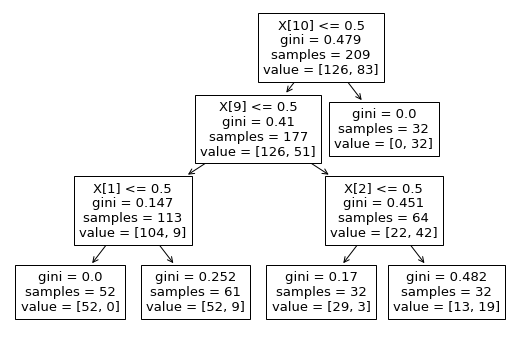

In [390]:
tree.plot_tree(clf)

In [391]:
from pprint import pprint
def sklearn_to_pydl(clf, pydl, level):
    if clf.tree_.feature[level] >= 0:
        pydl['feat'] = clf.tree_.feature[level]
        if clf.tree_.feature[clf.tree_.children_left[level]] == -2:
            level_leaf = clf.tree_.children_left[level]
            n_sample = clf.tree_.value[level_leaf][0][0] + clf.tree_.value[level_leaf][0][1]
            value0 = clf.tree_.value[level_leaf][0][0]
            value1 = clf.tree_.value[level_leaf][0][1]
            proba0 = clf.tree_.value[level_leaf][0][0] /n_sample
            proba1 = clf.tree_.value[level_leaf][0][1] /n_sample
            if proba0 > proba1:
                value=0
            else:
                value=1
            pydl['right'] = {'value' : value, 'error': 0, 'values': [value0, value1], 'proba': [proba0, proba1]}
        else:
            pydl['right'] = {'feat' : clf.tree_.feature[clf.tree_.children_left[level]]}
        sklearn_to_pydl(clf, pydl['right'], clf.tree_.children_left[level])
        if clf.tree_.feature[clf.tree_.children_right[level]] == -2:
            level_leaf = clf.tree_.children_right[level]
            n_sample = clf.tree_.value[level_leaf][0][0] + clf.tree_.value[level_leaf][0][1]
            value0 = clf.tree_.value[level_leaf][0][0]
            value1 = clf.tree_.value[level_leaf][0][1]
            proba0 = clf.tree_.value[level_leaf][0][0] /n_sample
            proba1 = clf.tree_.value[level_leaf][0][1] /n_sample
            if proba0 > proba1:
                value=0
            else:
                value=1
            pydl['left'] = {'value' : value, 'error': 0, 'values': [value0, value1], 'proba': [proba0, proba1]}
        else:
            pydl['left'] = {'feat' : clf.tree_.feature[clf.tree_.children_left[level]]}
        sklearn_to_pydl(clf, pydl['left'], clf.tree_.children_right[level])

In [392]:
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, list(y_train))
y_pred_train = clf.predict(X_train)
accuracy_train = round(accuracy_score(y_train, y_pred_train),6)
print("Accuracy DL8.5 on training set =", accuracy_train)
discrimation_train_pred = round(utils.discrimination(y_pred_train, sensitive_train), 6)
print("Discrimination of classifier on train(pred)", discrimation_train_pred)

Accuracy DL8.5 on training set = 0.880383
Discrimination of classifier on train(pred) 0.312952


In [393]:
pydl = dict()
sklearn_to_pydl(clf, pydl, 0)
#pydl

In [394]:
clf = DL85Classifier(max_depth=3, error_function=lambda tids: utils.misclassified(list(tids), y_train), min_sup=1, time_limit=600)
clf.fit(X_train, list(y_train))
y_pred_train = clf.predict(X_train)
accuracy_train = round(accuracy_score(y_train, y_pred_train),6)
print("Accuracy DL8.5 on training set =", accuracy_train)
discrimation_train_pred = round(utils.discrimination(y_pred_train, sensitive_train), 6)
print("Discrimination of classifier on train(pred)", discrimation_train_pred)

Accuracy DL8.5 on training set = 0.899522
Discrimination of classifier on train(pred) 0.277048


In [395]:
clf.tree_ = pydl
y_pred_train = clf.predict(X_train)
accuracy_train = round(accuracy_score(y_train, y_pred_train),6)
print("Accuracy DL8.5 on training set =", accuracy_train)
discrimation_train_pred = round(utils.discrimination(y_pred_train, sensitive_train), 6)
print("Discrimination of classifier on train(pred)", discrimation_train_pred)

Accuracy DL8.5 on training set = 0.880383
Discrimination of classifier on train(pred) 0.312952


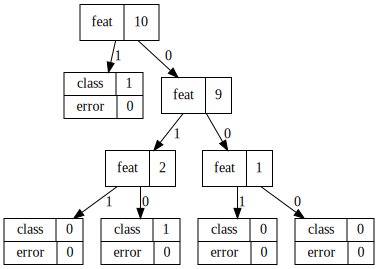

In [396]:
dot = clf.export_graphviz()
graphviz.Source(dot)

In [397]:
import uuid
from sklearn.exceptions import NotFittedError
from dl85.errors.errors import TreeNotFoundError, SearchFailedError


def get_dot_body(treedict, parent=None, left=True):
    gstring = ""
    id = str(uuid.uuid4())
    id = id.replace('-', '_')

    if "feat" in treedict.keys():
        feat = treedict["feat"]
        if parent is None:
            gstring += "node_" + id + " [label=\"{{feat|" + str(feat) + "}}\"];\n"
            gstring += get_dot_body(treedict["left"], id)
            gstring += get_dot_body(treedict["right"], id, False)
        else:
            gstring += "node_" + id + " [label=\"{{feat|" + str(feat) + "}}\"];\n"
            gstring += "node_" + parent + " -> node_" + id + " [label=" + str(int(left)) + "];\n"
            gstring += get_dot_body(treedict["left"], id)
            gstring += get_dot_body(treedict["right"], id, False)
    else:
        val = str(int(treedict["value"])) if treedict["value"] - int(treedict["value"]) == 0 else str(
            round(treedict["value"], 3))
        err = str(int(treedict["error"])) if treedict["error"] - int(treedict["error"]) == 0 else str(
            round(treedict["error"], 3))
        values = str(treedict["values"])

        gstring += "leaf_" + id + " [label=\"{{class|" + val + "}|{error|" + err + "}|{values|" + values + "}}\"];\n"
        #+ "}|{true positive|" + true_pos + "}|{false positive|" + false_pos + "}|{true negative|" + true_neg + "}|{false negative|" + false_neg \

        gstring += "node_" + parent + " -> leaf_" + id + " [label=" + str(int(left)) + "];\n"
    return gstring


def export_graphviz(clf):
    if clf.is_fitted_ is False:  # fit method has not been called
        raise NotFittedError("Call fit method first" % {'name': type(clf).__name__})

    if clf.tree_ is None:
        raise TreeNotFoundError("predict(): ", "Tree not found during training by DL8.5 - "
                                               "Check fitting message for more info.")

    if hasattr(clf, 'tree_') is False:  # normally this case is not possible.
        raise SearchFailedError("PredictionError: ", "DL8.5 training has failed. Please contact the developers "
                                                     "if the problem is in the scope supported by the tool.")

    # initialize the header
    graph_string = "digraph Tree { \n " \
                   "graph [ranksep=0]; \n " \
                   "node [shape=record]; \n"

    # build the body
    graph_string += get_dot_body(clf.tree_)

    # end by the footer
    graph_string += "}"

    return graph_string

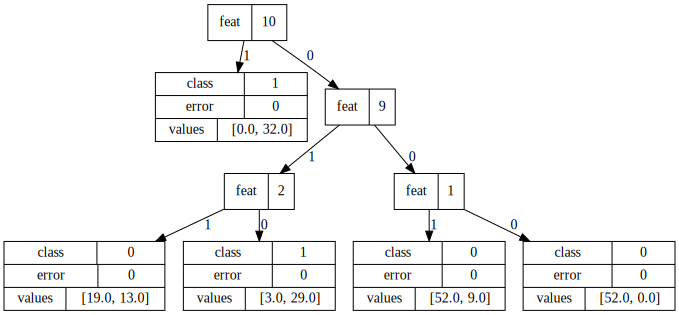

In [398]:
dot = export_graphviz(clf)
graphviz.Source(dot)

In [399]:
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, list(y_train))
leafs = list()
cnt = np.unique(sensitive, return_counts=True)[1]
relabeling_sklearn.leafs_to_relabel(clf.tree_, X_train, y_train, sensitive_train, cnt[0], cnt[1], leafs, len(y_train), 0)
leafs_relab = relabeling_sklearn.relab(clf.tree_, X_train, y_train, y_pred_train, sensitive_train, 0.1)
for leaf in leafs_relab:
    relabeling_sklearn.browse_and_relab(clf, leaf.node_id)
y_pred_train = clf.predict(X_train)
accuracy_train_relab = round(accuracy_score(y_train, y_pred_train), 6)
discrimation_train_pred_relab = round(utils.discrimination(y_pred_train, sensitive_train), 6)
new_acc= round(accuracy_train+sum_acc, 6)
new_disc = round(discrimation_train_pred+sum_disc, 6)
print(f"Accuracy:\n"
      f"    Before      : {accuracy_train}\n"
      f"    Leafs       : {sum_acc}\n"
      f"    After       : {accuracy_train_relab}\n"
      f"    Before+Leafs: {new_acc}\n"
      f"    Check       : {new_acc == accuracy_train_relab}")
print(f"Discrim:\n"
      f"    Before      : {discrimation_train_pred}\n"
      f"    Leafs       : {discrimation_train_pred_relab}\n"
      f"    After       : {sum_disc}\n"
      f"    Before+Leafs: {new_disc}\n"
      f"    Check       : {new_disc== discrimation_train_pred_relab}")

Accuracy:
    Before      : 0.880383
    Leafs       : -0.15311
    After       : 0.727273
    Before+Leafs: 0.727273
    Check       : True
Discrim:
    Before      : 0.312952
    Leafs       : 0.074095
    After       : -0.238857
    Before+Leafs: 0.074095
    Check       : True


In [400]:
pydl = dict()
sklearn_to_pydl(clf, pydl, 0)

In [401]:
clf = DL85Classifier(max_depth=3, error_function=lambda tids: utils.misclassified(list(tids), y_train), min_sup=1, time_limit=600)
clf.fit(X_train, list(y_train))
y_pred_train = clf.predict(X_train)
clf.tree_ = pydl
y_pred_train = clf.predict(X_train)
accuracy_train_relab = round(accuracy_score(y_train, y_pred_train), 6)
discrimation_train_pred_relab = round(utils.discrimination(y_pred_train, sensitive_train), 6)
new_acc= round(accuracy_train+sum_acc, 6)
new_disc = round(discrimation_train_pred+sum_disc, 6)
print(f"Accuracy:\n"
      f"    Before      : {accuracy_train}\n"
      f"    Leafs       : {sum_acc}\n"
      f"    After       : {accuracy_train_relab}\n"
      f"    Before+Leafs: {new_acc}\n"
      f"    Check       : {new_acc == accuracy_train_relab}")
print(f"Discrim:\n"
      f"    Before      : {discrimation_train_pred}\n"
      f"    Leafs       : {discrimation_train_pred_relab}\n"
      f"    After       : {sum_disc}\n"
      f"    Before+Leafs: {new_disc}\n"
      f"    Check       : {new_disc== discrimation_train_pred_relab}")

Accuracy:
    Before      : 0.880383
    Leafs       : -0.15311
    After       : 0.727273
    Before+Leafs: 0.727273
    Check       : True
Discrim:
    Before      : 0.312952
    Leafs       : 0.074095
    After       : -0.238857
    Before+Leafs: 0.074095
    Check       : True
